In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data= pd.read_csv("Markowitz_Data.csv", index_col = "Date")

In [3]:
data.head()

,PG,^GSPC
Date,,
2010-01-04,61.119999,1132.989990
2010-01-05,61.139999,1136.520020
2010-01-06,60.849998,1137.140015
2010-01-07,60.520000,1141.689941
2010-01-08,60.439999,1144.979980


In [5]:
#data.tail()

In [15]:
assets = []
for col in data.columns:
    assets.append(col)
#print(assets)

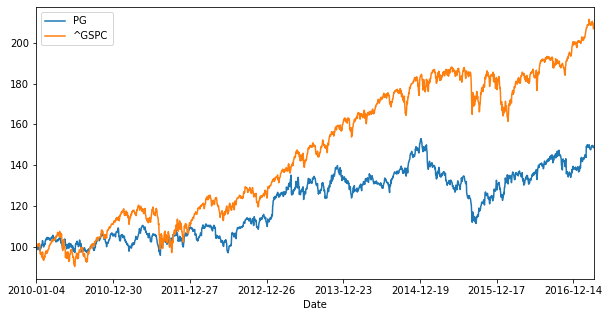

In [7]:
(data / data.iloc[0] * 100).plot(figsize=(10,5))

## Initial calculations

In [8]:
log_returns = np.log(data / data.shift(1))

In [9]:
log_returns.mean() * 250

PG       0.054082
^GSPC    0.099971
dtype: float64

In [10]:
log_returns.cov() * 250

,PG,^GSPC
PG,0.02048,0.012490
^GSPC,0.01249,0.023401


In [11]:
log_returns.corr()

,PG,^GSPC
PG,1.000000,0.570527
^GSPC,0.570527,1.000000


In [19]:
num_assets = len(assets)
#print(num_assets)

In [23]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.58485138, 0.41514862])

## Expected portfolio return

In [31]:
e_return = np.sum(weights * log_returns.mean()) * 250
print(e_return)

0.0731327841133198


## Expected portfolio variance

In [27]:
e_variance = np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))
print(e_variance)

0.017103310500510227


## Expected portfolio volatility

In [40]:
e_vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
print(e_vol)

0.1307796257087098


## Calculate efficient frontier

In [43]:
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    pfolio_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))))

pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)

pfolio_returns, pfolio_volatilities

(array([0.08351988, 0.08484099, 0.06295209, 0.09935289, 0.08590593,
        0.06933993, 0.06235723, 0.09118512, 0.05737812, 0.06387315,
        0.07602637, 0.0948198 , 0.06547981, 0.07913437, 0.07378577,
        0.06647611, 0.0566431 , 0.06679454, 0.07998528, 0.0631934 ,
        0.091064  , 0.06735018, 0.08952312, 0.06192823, 0.07912011,
        0.0585131 , 0.09681683, 0.06786916, 0.09022622, 0.06843342,
        0.06837605, 0.05627694, 0.07009513, 0.06951952, 0.07307323,
        0.08152637, 0.06739255, 0.08398413, 0.07470452, 0.09439611,
        0.07692428, 0.09639887, 0.06575887, 0.06519839, 0.06782728,
        0.08189344, 0.06170041, 0.08237286, 0.07620976, 0.09333833,
        0.08711685, 0.06188602, 0.09165019, 0.06989491, 0.08842143,
        0.05820515, 0.08216556, 0.07192349, 0.06253728, 0.07353639,
        0.0799835 , 0.07085509, 0.07273549, 0.08583514, 0.08900446,
        0.08677182, 0.06630043, 0.08344939, 0.06937601, 0.08537942,
        0.08788081, 0.0713021 , 0.09755929, 0.08

In [45]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [46]:
portfolios.head()

,Return,Volatility
0,0.083520,0.134190
1,0.084841,0.135132
2,0.062952,0.134526
3,0.099353,0.152021
4,0.085906,0.135970


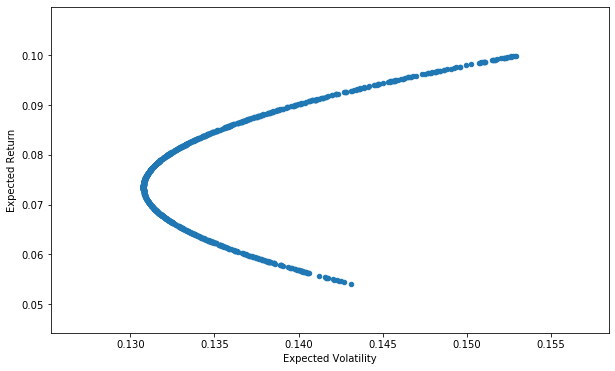

In [49]:
portfolios.plot(x='Volatility', y='Return', kind = 'scatter', figsize = (10,6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')
plt.show()